In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

NUMBER_OF_FEATURES=3387

In [4]:
path_First_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/First_Sticker'
path_Second_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Second_Sticker'
path_Third_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Third_Sticker'
path_Fourth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fourth_Sticker'
path_Fifth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fifth_Sticker'


In [3]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching_without_connecting_to_app.csv')


# Renaming the Title of each coloum 

First_Sticker_BackgroundRFactivities=First_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Connected=First_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching=First_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching_without_connected=First_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

# Chaning pandas to numpy
First_Sticker_BackgroundRFactivities_numpy = First_Sticker_BackgroundRFactivities.to_numpy()
First_Sticker_Connected_numpy = First_Sticker_Connected.to_numpy()
First_Sticker_Searching_numpy = First_Sticker_Searching.to_numpy()
First_Sticker_Searching_without_connected_numpy = First_Sticker_Searching_without_connected.to_numpy()


In [4]:
I_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_First_BackgroundRFactivities= I_Data_First_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_BackgroundRFactivities= Q_Data_First_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_BackgroundRFactivities_2Dim = np.concatenate((I_Data_First_BackgroundRFactivities,Q_Data_First_BackgroundRFactivities),axis=1)



I_Data_First_Connected = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected = First_Sticker_Connected_numpy[0:,1]

I_Data_First_Connected= I_Data_First_Connected.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Connected= Q_Data_First_Connected.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Connected_2Dim = np.concatenate((I_Data_First_Connected,Q_Data_First_Connected),axis=1)



I_Data_First_Searching = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching = First_Sticker_Searching_numpy[0:,1]

I_Data_First_Searching= I_Data_First_Searching.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Searching= Q_Data_First_Searching.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_2Dim = np.concatenate((I_Data_First_Searching,Q_Data_First_Searching),axis=1)


I_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,1]

I_Data_First_Searching_WIFI_established= I_Data_First_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Searching_WIFI_established= Q_Data_First_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_WIFI_established_2Dim = np.concatenate((I_Data_First_Searching_WIFI_established,Q_Data_First_Searching_WIFI_established),axis=1)



In [5]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

#scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites = MinMaxScaler(feature_range=(-1, 1))
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_First_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_BackgroundRFactivities_2Dim)

#scaler_connected = StandardScaler()
scaler_connected = MinMaxScaler(feature_range=(-1, 1))
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_First_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_First_Connected_2Dim)


#scaler_searching = StandardScaler()
scaler_searching = MinMaxScaler(feature_range=(-1, 1))
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_First_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_searching.transform(Concatenate_IQ_First_Searching_2Dim)


scaler_searching_WIFI_established = MinMaxScaler(feature_range=(-1, 1))
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_First_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_First_Searching_WIFI_established_2Dim)


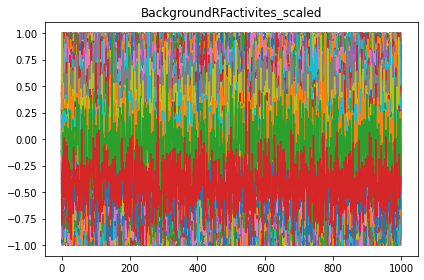

In [6]:
plt.plot(IQ_BackgroundRFactivites_numpy_scaled[0:3877])
plt.title("BackgroundRFactivites_scaled")
plt.tight_layout()
plt.show()

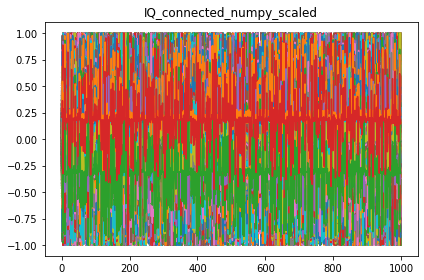

In [7]:
plt.plot(IQ_connected_numpy_scaled)
plt.title("IQ_connected_numpy_scaled")
plt.tight_layout()
plt.show()

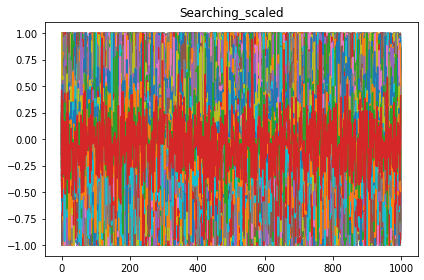

In [8]:
plt.plot(IQ_searching_numpy_scaled)
plt.title("Searching_scaled")
plt.tight_layout()
plt.show()

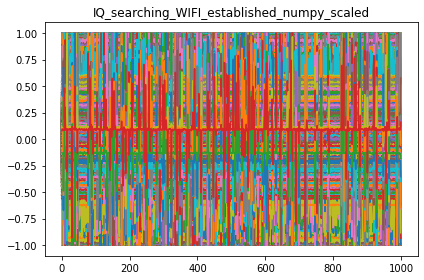

In [9]:
plt.plot(IQ_searching_WIFI_established_numpy_scaled)
plt.title("IQ_searching_WIFI_established_numpy_scaled")
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [11]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)


[[-0.09938848  0.11850178  0.11322434 ...  0.          0.
   0.        ]
 [-0.05125024  0.44394217  0.25434158 ...  0.          0.
   0.        ]
 [-0.21712259  0.34499336 -0.08444151 ...  0.          0.
   0.        ]
 [-0.26848164  0.27488968  0.34760609 ...  0.          0.
   0.        ]
 [ 0.02047834  0.22702974  0.04792901 ...  0.          0.
   0.        ]]


[[0.07780819 0.09411665 0.1578618  ... 1.         0.         0.        ]
 [0.07792868 0.09467377 0.16219786 ... 1.         0.         0.        ]
 [0.07983743 0.09598522 0.15767283 ... 1.         0.         0.        ]
 [0.08011259 0.09409022 0.16187943 ... 1.         0.         0.        ]
 [0.07900056 0.09613365 0.16398645 ... 1.         0.         0.        ]]


[[ 0.42293663 -0.21978341  0.14053912 ...  0.          1.
   0.        ]
 [ 0.41605658 -0.18476412 -0.0303

In [12]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

In [13]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)

3600


In [14]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]
print(Y_Train_Dataset)

(2800, 6774)
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [15]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print(Validation_Dataset.shape)

(800, 6774)


In [16]:
Train_Dataset=Train_Dataset.reshape(2800,6774,1)
Validation_Dataset=Validation_Dataset.reshape(800,6774,1)
print(Validation_Dataset.shape)

(800, 6774, 1)


In [17]:
Filterone = 100
Filtertwo = 160
KernalSize = 10
BATCH_SIZE = 100
epoch = 100
dropout = 0.2

model_m = Sequential()
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu', input_shape=(6774,1)))
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(dropout))
model_m.add(Dense(4, activation='softmax'))

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_m.summary()


history=model_m.fit(Train_Dataset,Y_Train_Dataset, epochs=epoch, batch_size=BATCH_SIZE,shuffle=True, verbose=1, validation_data=(Validation_Dataset,Y_Validation_Dataset), callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

_, accuracy_validation = model_m.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))

_, accuracy_Train = model_m.evaluate(Train_Dataset, Y_Train_Dataset)
print('Accuracy_Training: %.2f' % (accuracy_Train*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6765, 100)         1100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6756, 100)         100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2252, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2243, 160)         160160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2234, 160)         256160    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0

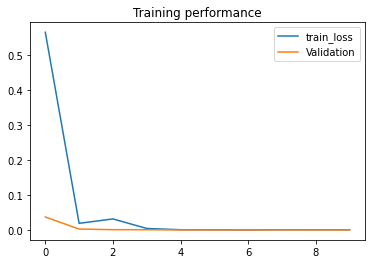

In [18]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [19]:
model_m.save("{MinMax Model} First_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {MinMax Model} First_Sticker_TRAINED/assets


# With MinMax Third Sticker Model Trained


In [21]:
from tensorflow import keras
load_third_Model = keras.models.load_model("{MinMax Model} Third_Sticker_TRAINED")
_,accuracy_loaded_third_model=load_third_Model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy_loaded_third_model*100))

25/25 [==============================] - 1s 31ms/step - loss: 0.3193 - accuracy: 0.8462
Accuracy: 84.62


## FFT of BackGround RF Activities [ First Sticker ]

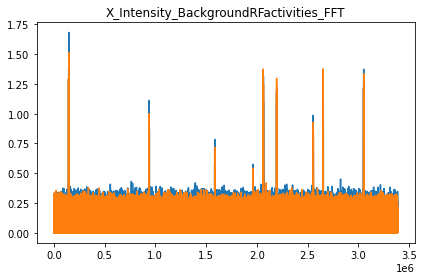

In [17]:
I_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = abs(np.fft.fftshift(fft(IQ_BackgroundRFactivites_numpy_scaled[:]-np.mean(IQ_BackgroundRFactivites_numpy_scaled[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

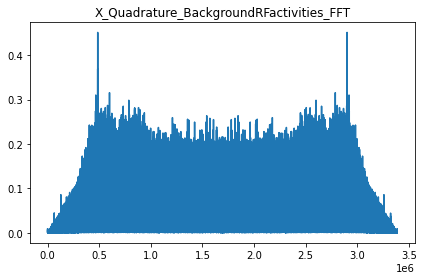

In [9]:
X_Quadrature_BackgroundRFactivities_FFT = abs(np.fft.fftshift(fft(Q_Data_First_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

# FFT Connected [ First Sticker ]

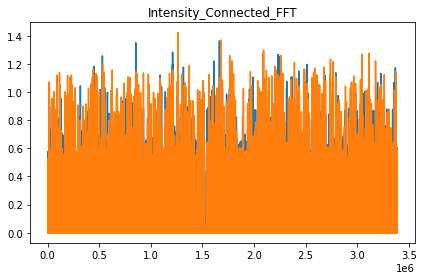

In [18]:
I_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = abs(np.fft.fftshift(fft(IQ_connected_numpy_scaled[:]-np.mean(IQ_connected_numpy_scaled[:]))))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

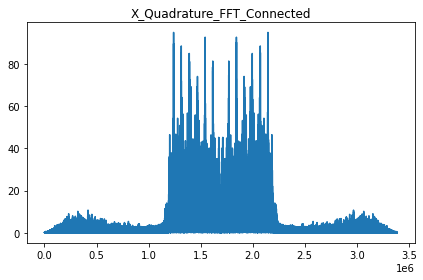

In [11]:
X_Quadrature_FFT_Connected = abs(np.fft.fftshift(fft(Q_Data_First_Connected_FFT[:]-np.mean(Q_Data_First_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

# FFT Searching [ First Sticker ]

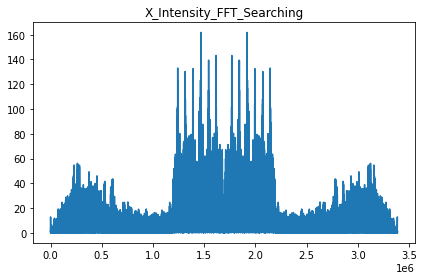

In [12]:
I_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = abs(np.fft.fftshift(fft(I_Data_First_Searching_FFT[:]-np.mean(I_Data_First_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

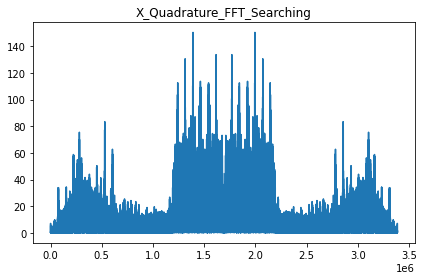

In [13]:
X_Quadrature_FFT_Searching = abs(np.fft.fftshift(fft(Q_Data_First_Searching_FFT[:]-np.mean(Q_Data_First_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching )
plt.title("X_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

# Searching with WIFI established [ First Sticker ] 

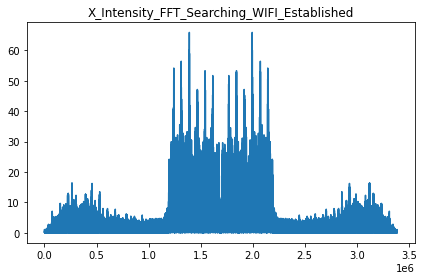

In [14]:
I_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = abs(np.fft.fftshift(fft(I_Data_First_Searching_WIFI_established_FFT[:]-np.mean(I_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

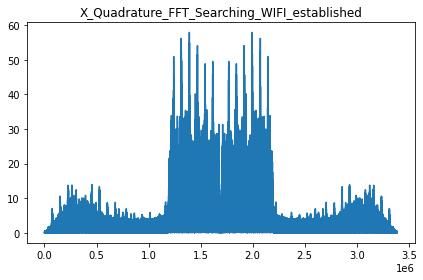

In [15]:
X_Quadrature_FFT_Searching_WIFI_established = abs(np.fft.fftshift(fft(Q_Data_First_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()